['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


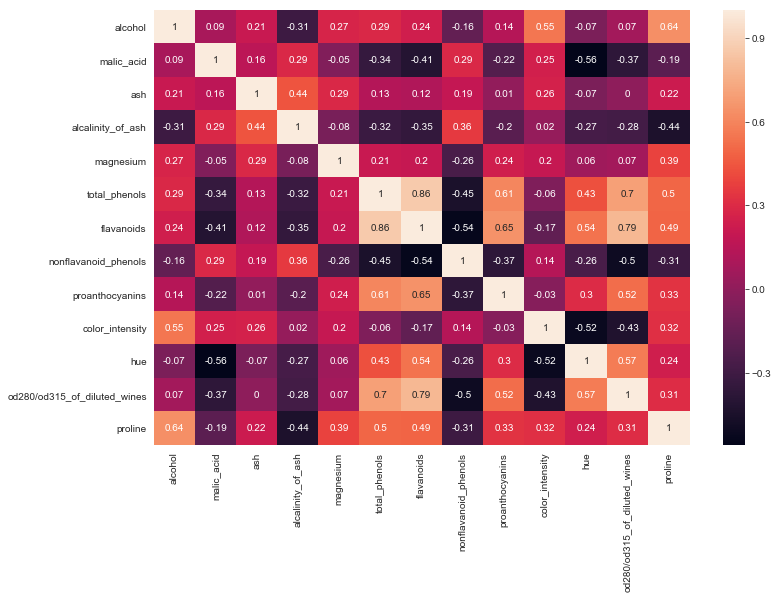

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

sns.set( { 'figure.figsize': (12, 8,) }, font_scale=1.1 )

D = load_wine()
print(D.feature_names)

df = pd.DataFrame(data=D.data, columns=D.feature_names)
X, y = D.data, D.target
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

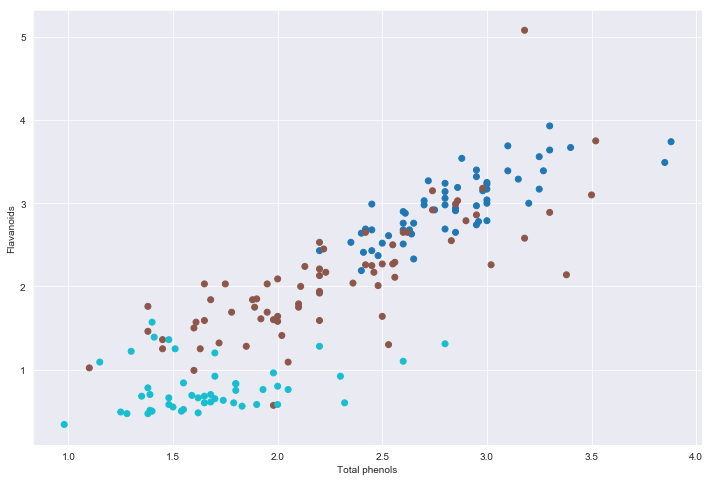

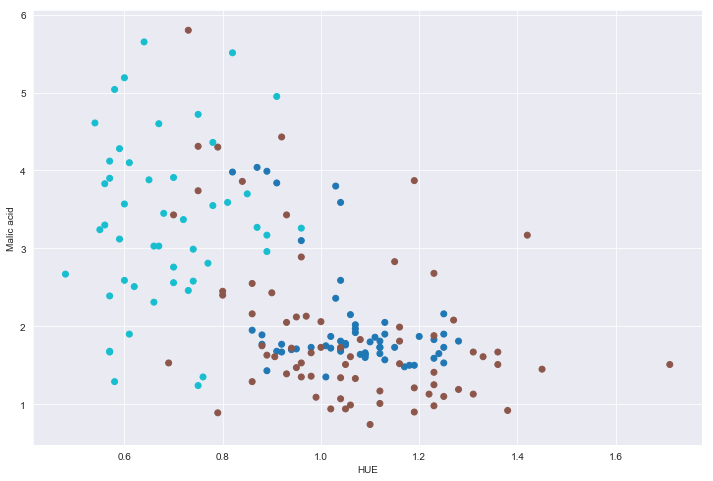

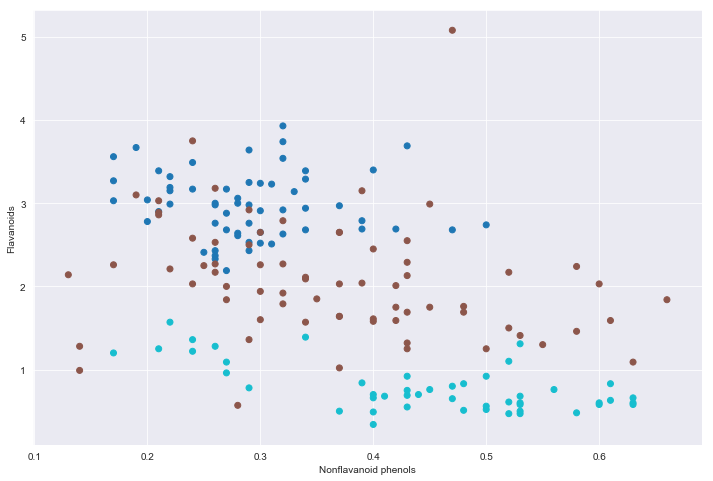

In [3]:
plt.scatter(df['total_phenols'].values, df['flavanoids'].values, c=y, cmap='tab10')
plt.xlabel('Total phenols')
plt.ylabel('Flavanoids')
plt.show()
plt.scatter(df['hue'].values, df['malic_acid'].values, c=y, cmap='tab10')
plt.xlabel('HUE')
plt.ylabel('Malic acid')
plt.show()
plt.scatter(df['nonflavanoid_phenols'].values, df['flavanoids'].values, c=y, cmap='tab10')
plt.xlabel('Nonflavanoid phenols')
plt.ylabel('Flavanoids')
plt.show()

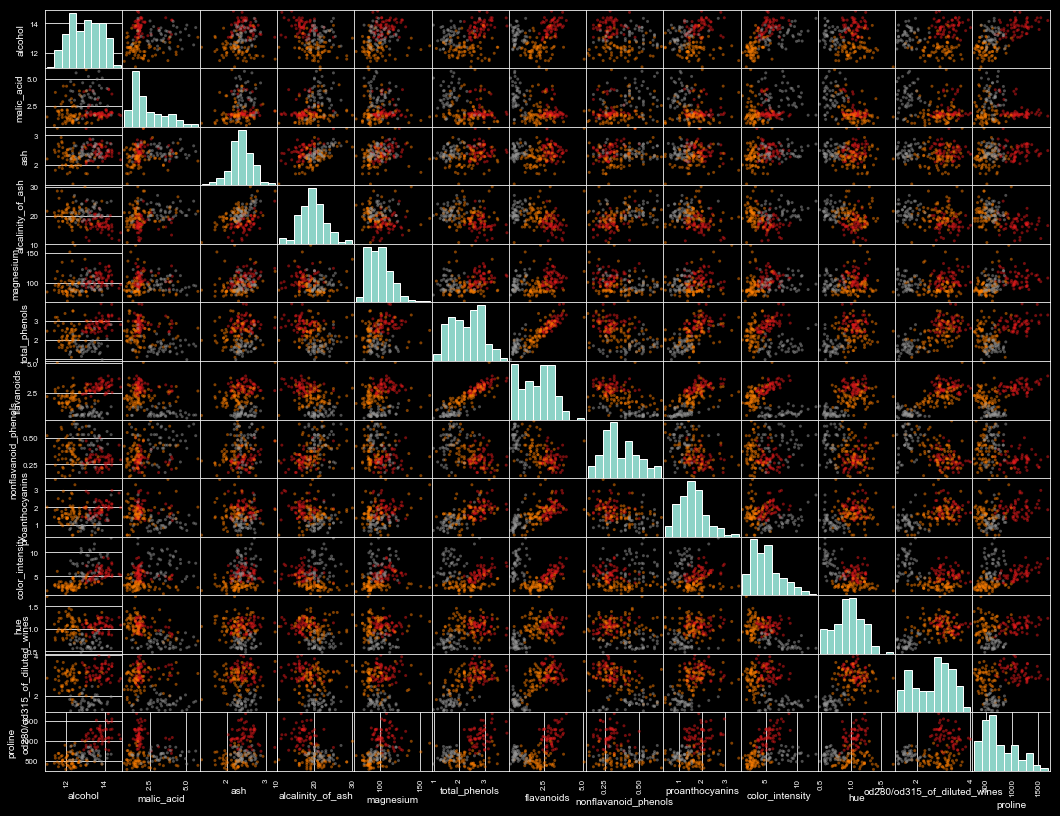

In [4]:
sns.set( { 'figure.figsize': (18, 14,) }, font_scale=1.1 )

with plt.style.context(('dark_background')):
    pd.plotting.scatter_matrix(df, c=y, cmap='Set1')

plt.show()

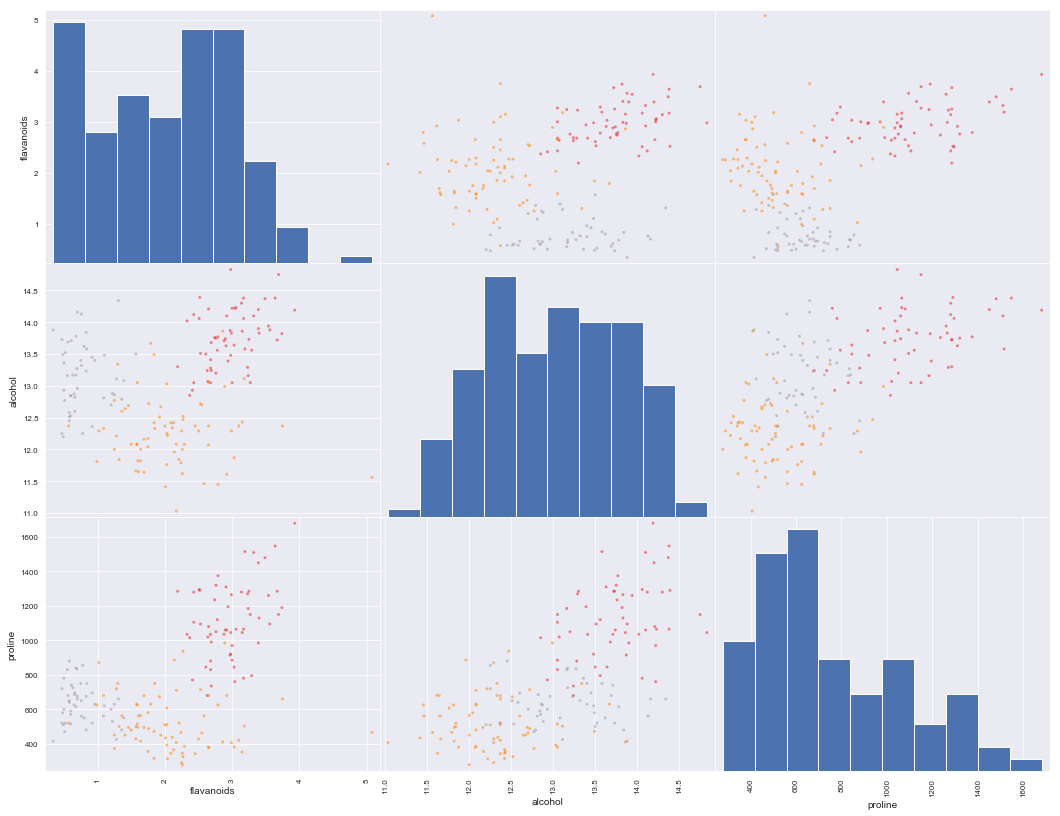

In [6]:
pd.plotting.scatter_matrix(df.loc[:, ['flavanoids', 'alcohol', 'proline']], c=y, cmap='Set1')
plt.show()
sns.set( { 'figure.figsize': (12, 10,) }, font_scale=1.1 )

### Predicting with different models

In [34]:
X1, X2 = df['flavanoids'].values, df['alcohol'].values
X_train, X_test, y_train, y_test = train_test_split(np.c_[X1, X2], y, test_size=.3)

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4)\
    .fit(X_train, y_train)
print('MSE on test set:', mse(y_test, lr.predict(X_test)))
print('MSE on train set:', mse(y_train, lr.predict(X_train)))

MSE on test set: 0.2037037037037037
MSE on train set: 0.18548387096774194


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)\
    .fit(X_train, y_train)
print('MSE on test set:', mse(y_test, dt.predict(X_test)))
print('MSE on train set:', mse(y_train, dt.predict(X_train)))

MSE on test set: 0.12962962962962962
MSE on train set: 0.0


In [37]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(
    random_state=10,
    shuffle=True,
    learning_rate_init=0.001,
    max_iter=5000,
    hidden_layer_sizes=(100,))\
    .fit(X_train, y_train)

print('MSE on test set:', mse(y_test, nn.predict(X_test)))
print('MSE on train set:', mse(y_train, nn.predict(X_train)))

MSE on test set: 0.14814814814814814
MSE on train set: 0.06451612903225806


So the best approximator for this problem is the Decision Tree Classification

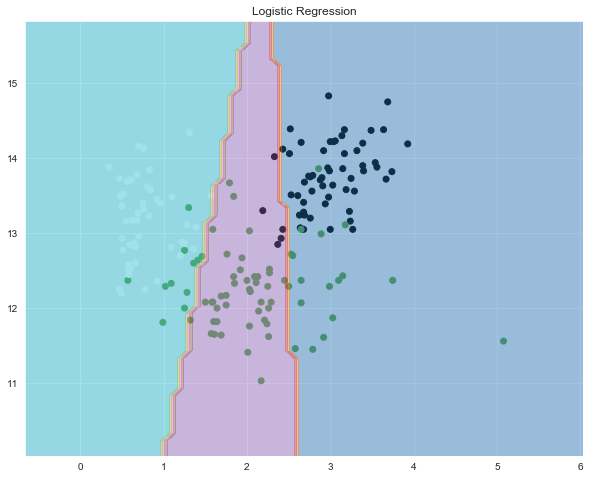

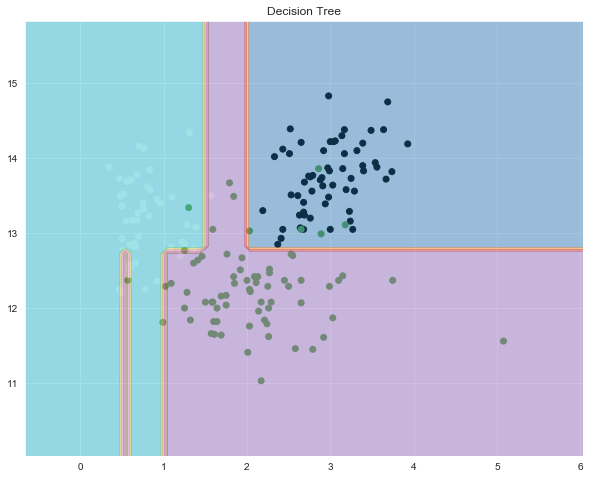

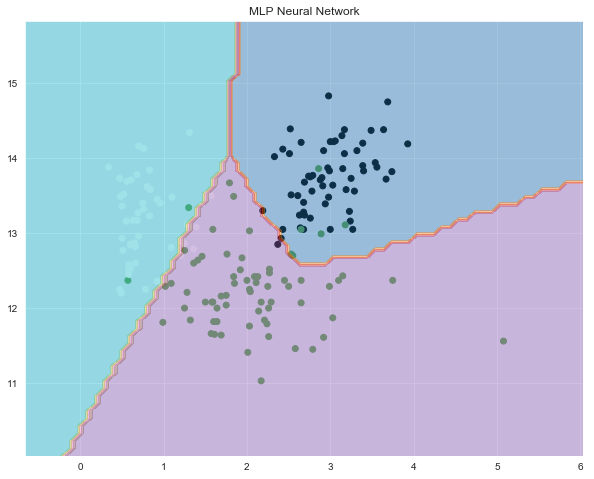

In [40]:
def test_model(model, title):
    sns.set( { 'figure.figsize': (10, 8,) }, font_scale=1.1 )
    plt.scatter(X1, X2, c=y, cmap='gist_earth')

    h = .1
    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])\
        .reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='tab10', alpha=0.4)
    plt.title(title)
    plt.show()

test_model(lr, 'Logistic Regression')
test_model(dt, 'Decision Tree')
test_model(nn, 'MLP Neural Network')